In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
print('tf.__version__=',tf.__version__)

tf.__version__= 2.2.0


In [3]:
fname = '/home/junkai/3D_v1.1/data20200813/train_dataset.npz'

train_datasets = np.load(fname)
print('dataset loaded with labels: ',train_datasets.files)
x_train, x_test, y_train, y_test = [train_datasets[i] for i in train_datasets.files]

dataset loaded with labels:  ['x_train', 'x_test', 'y_train', 'y_test']


In [4]:
class data_generator (keras.utils.Sequence):
    '''
    Data generator class from keras.ultils.Sequence.
    Load data from a file that contains the filenames in the path.
    usage:
    path: Path to the directory containing the data files
    fname_list: Dataset that containing filenames in the specified path
    labels: Labels associated with the loaded train data
    '''
    def __init__(self,path,fname_list,labels,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.labels = labels
        self.batch_size = batch_size
        print('generator for {} files of {} batches of size {}'.format(len(fname_list),self.__len__(),self.batch_size))

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels [idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([np.load(self.path+file) for file in batch_x]),batch_y

In [5]:
path = '/home/junkai/3D_v1.1/data20200813/train/'
batch_size = 1

train_generator = data_generator(path,x_train,y_train,batch_size)
validation_generator = data_generator(path,x_test,y_test,batch_size)

generator for 1252 files of 1252 batches of size 1
generator for 1253 files of 1253 batches of size 1


In [6]:
input_shape = [i for i in train_generator[0]][0][0].shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10010     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 10,021
Trainable params: 10,021
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                   steps_per_epoch = train_generator.__len__(),
                   epochs = 20,
                   verbose = 1,
                   validation_data = validation_generator,
                   validation_steps = validation_generator.__len__())

Epoch 1/20
1252/1252 [==============================] - 5s 4ms/step - loss: 0.6851 - accuracy: 0.6629 - val_loss: 0.6664 - val_accuracy: 0.6736
Epoch 2/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6543 - accuracy: 0.6957 - val_loss: 0.6562 - val_accuracy: 0.6760
Epoch 3/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6435 - accuracy: 0.7005 - val_loss: 0.6533 - val_accuracy: 0.6744
Epoch 4/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6392 - accuracy: 0.7053 - val_loss: 0.6519 - val_accuracy: 0.6760
Epoch 5/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6371 - accuracy: 0.7077 - val_loss: 0.6523 - val_accuracy: 0.6720
Epoch 6/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6355 - accuracy: 0.7077 - val_loss: 0.6520 - val_accuracy: 0.6720
Epoch 7/20
1252/1252 [==============================] - 2s 2ms/step - loss: 0.6339 - accuracy: 0.7093 - val_loss: 0.6524 - val_accuracy:

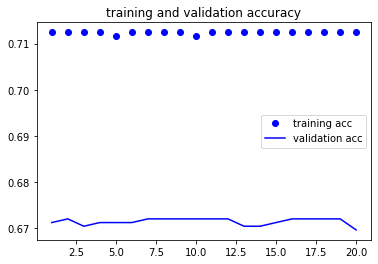

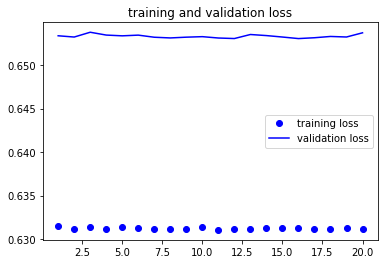

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss, 'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [10]:
fname = '/home/junkai/3D_v1.1/data20200814/model.h5'

model.save(fname)